In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
print(os.listdir("../NYC Taxi fare prediction"))

['.ipynb_checkpoints', 'NYC.ipynb', 'test.csv', 'train.csv', 'train.csv.zip']


In [3]:
data = pd.read_csv("../NYC Taxi fare prediction/train.csv", nrows = 3900000)
data.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [4]:
cols = ['fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count']
data = pd.read_csv("../NYC Taxi fare prediction/train.csv", nrows =3900000, usecols = cols )
print(data.columns)
print(data.shape)

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')
(3900000, 7)


In [5]:
data.head(2000)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.90,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.30,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,12.10,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,7.50,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,16.50,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,9.00,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,8.90,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [6]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,3.900000e+06,3.900000e+06,3.900000e+06,3.899973e+06,3.899973e+06,3.900000e+06
mean,1.134466e+01,-7.250768e+01,3.991811e+01,-7.250810e+01,3.991700e+01,1.684312e+00
std,9.828737e+00,1.313795e+01,8.756408e+00,1.291298e+01,9.705830e+00,1.329612e+00
min,-6.200000e+01,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075314e+01,1.000000e+00
75%,1.250000e+01,-7.396711e+01,4.076712e+01,-7.396367e+01,4.076812e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,2.912465e+03,3.457622e+03,3.345917e+03,2.080000e+02


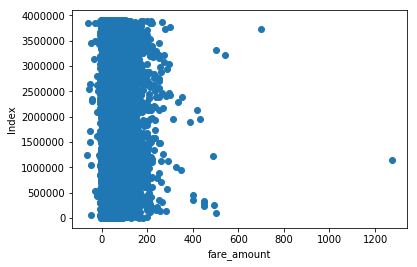

In [7]:
plt.scatter(x=data.fare_amount,y=data.index)
plt.ylabel('Index')
plt.xlabel('fare_amount')
plt.show()

In [8]:
data['fare_amount'][(data.fare_amount<0) | (data.fare_amount>=300)].count()

186

In [9]:
data.shape

(3900000, 7)

In [10]:
data = data.drop(data[(data.fare_amount<0) | (data.fare_amount>=300)].index,axis=0)

In [11]:
data.shape

(3899814, 7)

In [12]:
data.fare_amount.isnull().sum()

0

In [13]:
data.shape

(3899814, 7)

In [14]:
data.isnull().sum()

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    27
dropoff_latitude     27
passenger_count       0
dtype: int64

In [15]:
print(data.pickup_latitude.head(10))
print(data.dropoff_latitude.head(10))

0    40.721319
1    40.711303
2    40.761270
3    40.733143
4    40.768008
5    40.731630
6    40.751662
7    40.774138
8    40.726713
9    40.733873
Name: pickup_latitude, dtype: float64
0    40.712278
1    40.782004
2    40.750562
3    40.758092
4    40.783762
5    40.758233
6    40.764842
7    40.751048
8    40.731628
9    40.758138
Name: dropoff_latitude, dtype: float64


In [16]:
test_data = pd.read_csv("../NYC Taxi fare prediction/test.csv")
test_data.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [17]:
lon_min = min(test_data.pickup_longitude.min(),test_data.dropoff_longitude.min())
lon_max = max(test_data.pickup_longitude.max(),test_data.dropoff_longitude.max())
print(lon_min, lon_max)

-74.263242 -72.986532


In [18]:
lat_min = min(test_data.pickup_latitude.min(),test_data.dropoff_latitude.min())
lat_max = max(test_data.pickup_latitude.max(),test_data.dropoff_latitude.max())
print(lat_min, lat_max)

40.568973 41.709555


In [19]:
print(data.shape)
data[(data.pickup_latitude<lat_min) | (data.pickup_latitude>lat_max)]


(3899814, 7)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
11,5.50,2012-12-24 11:24:00 UTC,0.000000,0.000000,0.000000,0.000000,3
15,5.00,2013-11-23 12:57:00 UTC,0.000000,0.000000,0.000000,0.000000,1
26,6.50,2011-02-07 20:01:00 UTC,0.000000,0.000000,0.000000,0.000000,1
124,8.00,2013-01-17 17:22:00 UTC,0.000000,0.000000,0.000000,0.000000,2
192,3.70,2010-09-05 17:08:00 UTC,0.000000,0.000000,0.000000,0.000000,5
233,8.50,2011-07-24 01:14:35 UTC,0.000000,0.000000,0.000000,0.000000,2
273,8.10,2009-10-30 18:13:00 UTC,0.000000,0.000000,0.000000,0.000000,4
357,8.50,2013-07-04 16:41:27 UTC,0.000000,0.000000,0.000000,0.000000,1
376,2.50,2014-05-29 05:57:22 UTC,0.000000,0.000000,0.000000,0.000000,1
387,13.00,2012-11-15 08:39:00 UTC,0.000000,0.000000,0.000000,0.000000,1


In [20]:
data.drop(data[(data.pickup_latitude<lat_min) | (data.pickup_latitude>lat_max)].index,axis=0,inplace=True)

In [21]:
data.shape

(3822151, 7)

In [22]:
data[(data.dropoff_latitude<lat_min) | (data.dropoff_latitude>lat_max)].count()
data.drop(data[(data.dropoff_latitude<lat_min) | (data.dropoff_latitude>lat_max)].index,axis=0,inplace=True)
data.shape

(3818108, 7)

In [23]:
print(data.pickup_longitude.tail(5))
print(data.dropoff_longitude.tail(5))

3899994   -73.981649
3899996   -73.978907
3899997   -73.969220
3899998   -73.973200
3899999   -73.995914
Name: pickup_longitude, dtype: float64
3899994   -73.964624
3899996   -73.940910
3899997   -73.989940
3899998   -73.974622
3899999   -73.988407
Name: dropoff_longitude, dtype: float64


In [24]:
data.pickup_longitude.abs().tail()

3899994    73.981649
3899996    73.978907
3899997    73.969220
3899998    73.973200
3899999    73.995914
Name: pickup_longitude, dtype: float64

In [25]:
data[(data.pickup_longitude <lon_min) | (data.pickup_longitude >lon_max)].count()

fare_amount          1117
pickup_datetime      1117
pickup_longitude     1117
pickup_latitude      1117
dropoff_longitude    1117
dropoff_latitude     1117
passenger_count      1117
dtype: int64

In [26]:
data.drop(data[(data.pickup_longitude<lon_min) | (data.pickup_longitude>lon_max)].index,axis=0,inplace=True)
data.shape

(3816991, 7)

In [27]:
data[(data.dropoff_longitude<lon_min) | (data.dropoff_longitude>lon_max)].count()


fare_amount          626
pickup_datetime      626
pickup_longitude     626
pickup_latitude      626
dropoff_longitude    626
dropoff_latitude     626
passenger_count      626
dtype: int64

In [28]:
data.drop(data[(data.dropoff_longitude<lon_min) | (data.dropoff_longitude>lon_max)].index,axis=0,inplace=True)
data.shape

(3816365, 7)

In [29]:
data.isnull().sum()

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    26
dropoff_latitude     26
passenger_count       0
dtype: int64

In [30]:
data[data.dropoff_longitude.isnull()==True].head(1)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
120227,12.5,2012-12-11 12:57:00 UTC,-73.99276,40.743098,NaN,NaN,0


In [31]:
data.drop(data[data.dropoff_longitude.isnull()==True].index, axis=0, inplace = True)
data.shape

(3816339, 7)

In [32]:
data.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,3.816339e+06,3.816339e+06,3.816339e+06,3.816339e+06,3.816339e+06,3.816339e+06
mean,1.131581e+01,-7.397512e+01,4.075110e+01,-7.397425e+01,4.075148e+01,1.684218e+00
std,9.614428e+00,3.836113e-02,2.953890e-02,3.740515e-02,3.268753e-02,1.313017e+00
min,0.000000e+00,-7.426321e+01,4.056905e+01,-7.426320e+01,4.056898e+01,0.000000e+00
25%,6.000000e+00,-7.399228e+01,4.073656e+01,-7.399158e+01,4.073560e+01,1.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075335e+01,-7.398061e+01,4.075386e+01,1.000000e+00
75%,1.250000e+01,-7.396833e+01,4.076755e+01,-7.396535e+01,4.076841e+01,2.000000e+00
max,2.902500e+02,-7.301175e+01,4.169685e+01,-7.301178e+01,4.169126e+01,2.080000e+02


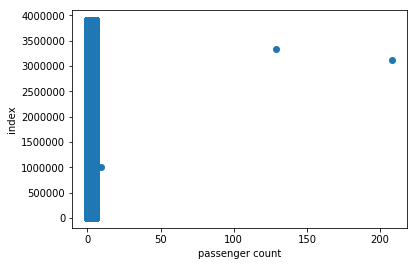

In [33]:
plt.scatter(x = data.passenger_count,y = data.index)
plt.xlabel('passenger count')
plt.ylabel('index')
plt.show()

In [34]:
data['passenger_count'][data.passenger_count ==0].count()

13548

In [35]:
print(data.shape)
data.drop(data[data.passenger_count==0].index,axis=0,inplace =True)
print(data.shape)

(3816339, 7)
(3802791, 7)


In [36]:

print(data.shape)
data.drop(data[data.passenger_count>8].index,axis=0,inplace=True)
print(data.shape)

(3802791, 7)
(3802788, 7)


In [37]:
data.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [38]:
data['pickup_datetime'].head(3)

0    2009-06-15 17:26:21 UTC
1    2010-01-05 16:52:16 UTC
2    2011-08-18 00:35:00 UTC
Name: pickup_datetime, dtype: object

In [39]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'],infer_datetime_format=True)

In [40]:
data['pickup_datetime'].head(1)

0   2009-06-15 17:26:21
Name: pickup_datetime, dtype: datetime64[ns]

In [41]:

data['year'] = data['pickup_datetime'].dt.year
data['Month'] = data['pickup_datetime'].dt.month
data['Date'] = data['pickup_datetime'].dt.day
data['Day of Week'] = data['pickup_datetime'].dt.dayofweek
data['Hour'] = data['pickup_datetime'].dt.hour
data['Minute'] = data['pickup_datetime'].dt.minute

In [42]:
data.head(3)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day of Week,Hour,Minute
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35


In [43]:
data.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day of Week                   int64
Hour                          int64
Minute                        int64
dtype: object

In [44]:
from math import radians, cos,sin, asin, sqrt
def haversine(a):
    lon1 = a[0]
    lat1 = a[1]
    lon2 = a[2]
    lat2 = a[3]
    
    lon1, lat1, lon2,lat2 = map(radians, [lon1,lat1,lon2,lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2* asin(sqrt(a))
    km = 6371*c
    return km

In [45]:
data['distance'] = data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [46]:
data['distance'].head(5)

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
Name: distance, dtype: float64

In [47]:
data[data.distance==0].shape

(40533, 14)

In [48]:
data.drop(data[data.distance==0].index,axis=0,inplace=True)
print(data.shape)

(3762255, 14)


Text(0,0.5,'Fare')

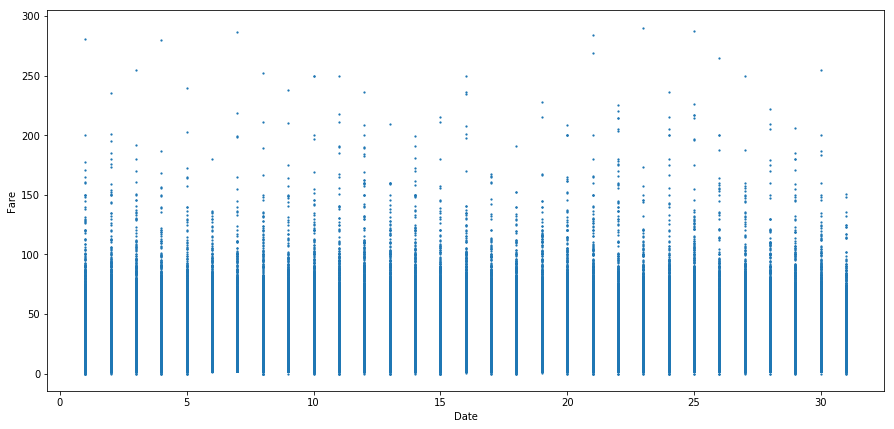

In [49]:
plt.figure(figsize = (15,7))
plt.scatter(x = data['Date'], y=data['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

Text(0,0.5,'Frequency')

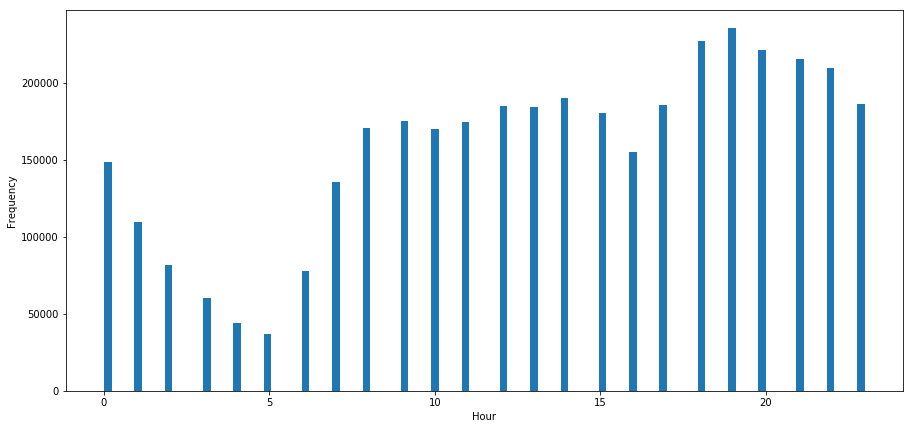

In [50]:

plt.figure(figsize=(15,7))
plt.hist(data['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Text(0,0.5,'Fare')

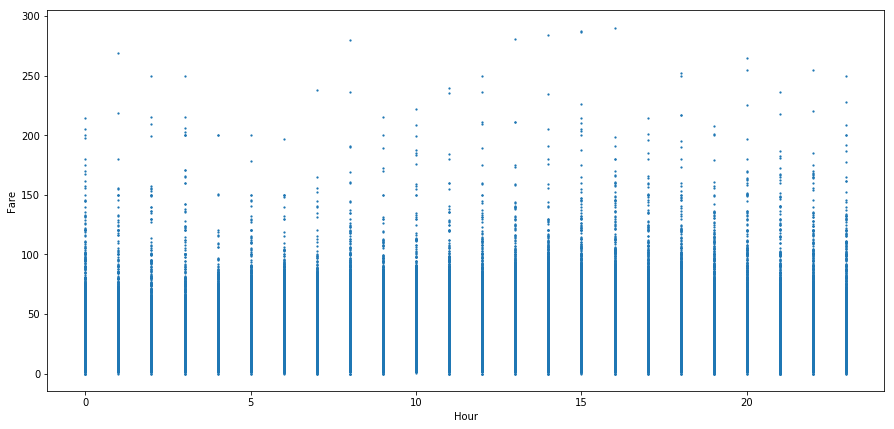

In [51]:
plt.figure(figsize=(15,7))
plt.scatter(x=data['Hour'], y=data['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

Text(0,0.5,'Frequency')

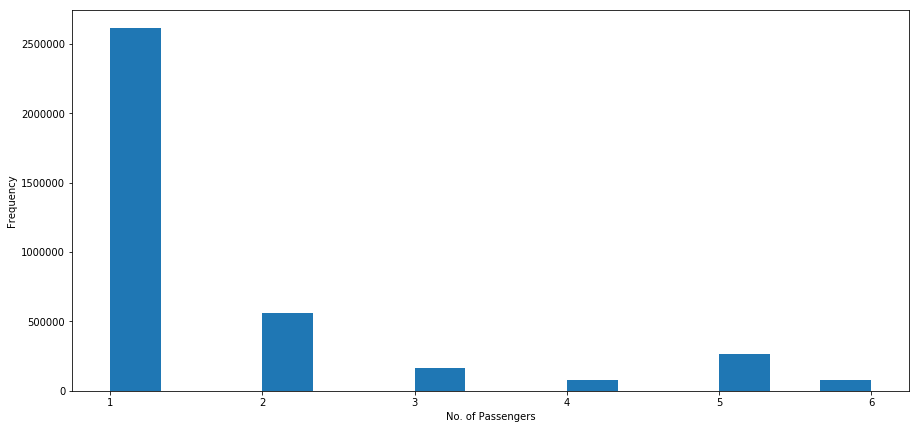

In [52]:

plt.figure(figsize=(15,7))
plt.hist(data['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0,0.5,'Fare')

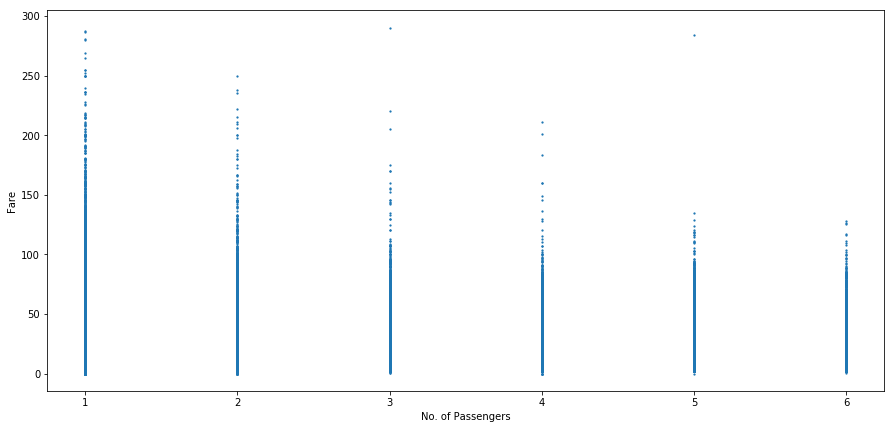

In [53]:
plt.figure(figsize=(15,7))
plt.scatter(x=data['passenger_count'], y=data['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

Text(0,0.5,'Frequency')

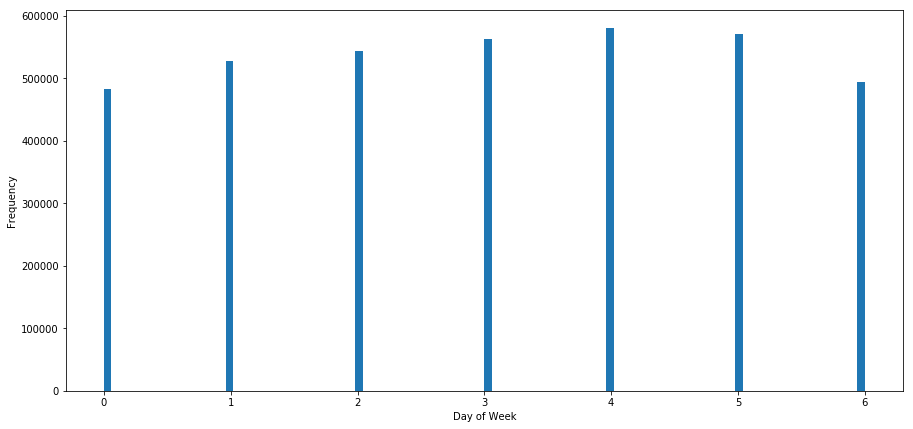

In [54]:

plt.figure(figsize=(15,7))
plt.hist(data['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')


In [55]:
test_data=pd.read_csv("../NYC Taxi fare prediction/test.csv")
test_data.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [56]:
test_data.dtypes


key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [57]:

test_data['key']=pd.to_datetime(test_data['key'], infer_datetime_format=True)
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'], infer_datetime_format=True)

In [58]:
test_data.dtypes


key                  datetime64[ns]
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [59]:
test_data['year'] = test_data['pickup_datetime'].dt.year
test_data['Month'] = test_data['pickup_datetime'].dt.month
test_data['Date'] = test_data['pickup_datetime'].dt.day
test_data['Day of Week'] = test_data['pickup_datetime'].dt.dayofweek
test_data['Hour'] = test_data['pickup_datetime'].dt.hour
test_data['Minute'] = test_data['pickup_datetime'].dt.minute

In [60]:
test_data.head(3)


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day of Week,Hour,Minute
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53


In [61]:
test_data.isnull().sum()


key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day of Week          0
Hour                 0
Minute               0
dtype: int64

In [62]:

from math import radians, cos, sin, asin, sqrt,atan2
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min

In [63]:
test_data['distance']=test_data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [64]:
test_data['distance'].describe()

count    9914.000000
mean        3.435371
std         3.972374
min         0.000000
25%         1.298277
50%         2.217412
75%         4.045302
max        99.996040
Name: distance, dtype: float64

In [65]:
test_data['distance'].describe()

count    9914.000000
mean        3.435371
std         3.972374
min         0.000000
25%         1.298277
50%         2.217412
75%         4.045302
max        99.996040
Name: distance, dtype: float64

In [66]:
test_data.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'Month', 'Date', 'Day of Week', 'Hour', 'Minute', 'distance'],
      dtype='object')

In [67]:
data.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day of Week                   int64
Hour                          int64
Minute                        int64
distance                    float64
dtype: object

In [68]:
print(data.shape)
data=data.drop('pickup_datetime',axis=1)
print(data.shape)

(3762255, 14)
(3762255, 13)


In [69]:
data.dtypes


fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
Month                  int64
Date                   int64
Day of Week            int64
Hour                   int64
Minute                 int64
distance             float64
dtype: object

In [70]:
data.iloc[:,:].head(1)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day of Week,Hour,Minute,distance
0,4.5,-73.844311,40.721319,-73.84161,40.712278,1,2009,6,15,0,17,26,1.030764


In [71]:
X=data.drop("fare_amount",axis=1)
y=data.iloc[:,0].values


In [72]:
X.shape


(3762255, 12)

In [73]:
y.shape


(3762255,)

In [74]:
X_test=test_data
print(X_test.columns)
print(X_test.shape)
print(X_test.dtypes)

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'Month', 'Date', 'Day of Week', 'Hour', 'Minute', 'distance'],
      dtype='object')
(9914, 14)
key                  datetime64[ns]
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day of Week                   int64
Hour                          int64
Minute                        int64
distance                    float64
dtype: object


In [75]:
X_test.drop(["key","pickup_datetime"],axis=1,inplace=True)


In [76]:
print(X_test.shape)
print(X_test.dtypes)


(9914, 12)
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
Month                  int64
Date                   int64
Day of Week            int64
Hour                   int64
Minute                 int64
distance             float64
dtype: object


In [77]:
'''from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y =train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.ensemble  import RandomForestRegressor
Regression =RandomForestRegressor(n_estimators=70,min_samples_leaf=5,random_state=0)
Regression.fit(train_X,train_y)
y_test_pred=Regression.predict(val_X)
print(y_test_pred)'''


'from sklearn.model_selection import train_test_split\ntrain_X, val_X, train_y, val_y =train_test_split(X,y,test_size=0.2,random_state=0)\nfrom sklearn.ensemble  import RandomForestRegressor\nRegression =RandomForestRegressor(n_estimators=70,min_samples_leaf=5,random_state=0)\nRegression.fit(train_X,train_y)\ny_test_pred=Regression.predict(val_X)\nprint(y_test_pred)'

In [78]:
'''from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(val_y,y_test_pred))'''

'from sklearn.metrics import mean_absolute_error\nprint(mean_absolute_error(val_y,y_test_pred))'

In [79]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y =train_test_split(X,y,test_size=0.2,random_state=0)

In [80]:

import xgboost
Regression_xgbooost =xgboost.XGBRegressor(n_estimators=300,max_depth=15,max_leaves=9,random_state=0)
Regression_xgbooost.fit(train_X,train_y)
y_pred=Regression_xgbooost.predict(val_X)

[15:14:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [81]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(val_y,y_pred))

1.4638380018542105


In [82]:
submission = pd.read_csv('../NYC Taxi fare prediction/submission.csv')
submission['fare_amount'] = y_test_pred
submission.to_csv('submission_K_39k_300_15_9.csv', index=False)
submission

FileNotFoundError: File b'../NYC Taxi fare prediction/submission.csv' does not exist